# Iraqi doctors

Dataset: Private

Author: https://github.com/mohammedmahdiali

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
data = pd.read_excel('../doctors.xlsx')
data.head()

,المحافظة,المنطقة,العنوان,رقم موبايل,الاختصاص,الاسم,Online Status,Provider Name,Doctor Specialty,Address,Region,Governorate
0,بغداد,الوزيرية,مستشفى الدولي,7700200633\n07800807059,جراحة عامة الباطنية والجهاز الهضمي,حارث مثنى خليل,Online,Hareth Muthanna Khalil,"Gastroenterology, General Surgery",Al-Dowaly Hospital,Alwazayria,Baghdad
1,بغداد,الوزيرية,مستشفى الدولي,7700200633\n07800807059,طب الاطفال وحديثي الولادة,بسام حامد,Online,Bassam Hamed,Pediatrics,Al-Dowaly Hospital,Alwazayria,Baghdad
2,بغداد,الوزيرية,مستشفى الدولي,7700200633\n07800807059,امراض الكلى,محمد حنون السوداني,Online,Muhammad Hanoun Al-Sudani,nephrology,Al-Dowaly Hospital,Alwazayria,Baghdad
3,بغداد,الوزيرية,مستشفى الدولي,7700200633\n07800807059,جراحة نسائية وتوليد,صبا السامي,Online,Saba Sami,Obstetrics and Gynecology,Al-Dowaly Hospital,Alwazayria,Baghdad
4,بغداد,الوزيرية,مستشفى الدولي,7700200633\n07800807059,جراحة نسائية وتوليد,اسراء طالب,Online,Israa Talib,Obstetrics and Gynecology,Al-Dowaly Hospital,Alwazayria,Baghdad


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0    المحافظة         309 non-null    object
 1   المنطقة           309 non-null    object
 2   العنوان           309 non-null    object
 3   رقم موبايل        309 non-null    object
 4   الاختصاص          309 non-null    object
 5   الاسم             309 non-null    object
 6   Online Status     309 non-null    object
 7   Provider Name     309 non-null    object
 8   Doctor Specialty  308 non-null    object
 9   Address           309 non-null    object
 10  Region            309 non-null    object
 11  Governorate       309 non-null    object
dtypes: object(12)
memory usage: 29.1+ KB


In [4]:
data.columns

Index([' المحافظة', 'المنطقة ', 'العنوان ', 'رقم موبايل', 'الاختصاص', 'الاسم',
       'Online Status', 'Provider Name', 'Doctor Specialty', 'Address',
       'Region', 'Governorate'],
      dtype='object')

### Data cleaning

#### Columns

In [5]:
to_drop = [' المحافظة', 'المنطقة ' , 'العنوان ' ,'الاختصاص' ,'الاسم', 'Online Status']
data.drop(columns=to_drop, axis=1, inplace=True)

In [6]:
data.rename(columns={'رقم موبايل':'phone'}, inplace=True)

data.columns = [col.lower().strip().replace(' ', '_') for col in data.columns]

In [7]:
# I just need first phone number
data['phone'] = data['phone'].apply(lambda x: str(x).split('\n')[0])

In [8]:
data.head()

,phone,provider_name,doctor_specialty,address,region,governorate
0,7700200633,Hareth Muthanna Khalil,"Gastroenterology, General Surgery",Al-Dowaly Hospital,Alwazayria,Baghdad
1,7700200633,Bassam Hamed,Pediatrics,Al-Dowaly Hospital,Alwazayria,Baghdad
2,7700200633,Muhammad Hanoun Al-Sudani,nephrology,Al-Dowaly Hospital,Alwazayria,Baghdad
3,7700200633,Saba Sami,Obstetrics and Gynecology,Al-Dowaly Hospital,Alwazayria,Baghdad
4,7700200633,Israa Talib,Obstetrics and Gynecology,Al-Dowaly Hospital,Alwazayria,Baghdad


#### Data

* __*phone*__

In [9]:
data['phone'].value_counts() # 0, -

078-00344311     45
7801991511       35
7700200633       29
078-06552555     24
7510214819       22
7821716172       19
7735244716       17
7901281544       16
7805561636       15
7809797971       14
07714559697      13
077-21359222‬    11
7700070175       10
077-15686496     10
075-12489910      9
7809323905        8
078-27784499      8
07734446662       3
078-04216765      1
Name: phone, dtype: int64

In [10]:
def fix_phone(phone):
    if '-' in str(phone):
        return str(phone).replace('-', '')
    elif len(str(phone)) == 10:
        return '0' + str(phone)
    else:
        return str(phone)

data['phone'] = data['phone'].apply(fix_phone)
data['phone'].value_counts()

07800344311     45
07801991511     35
07700200633     29
07806552555     24
07510214819     22
07821716172     19
07735244716     17
07901281544     16
07805561636     15
07809797971     14
07714559697     13
07721359222‬    11
07700070175     10
07715686496     10
07512489910      9
07827784499      8
07809323905      8
07734446662      3
07804216765      1
Name: phone, dtype: int64

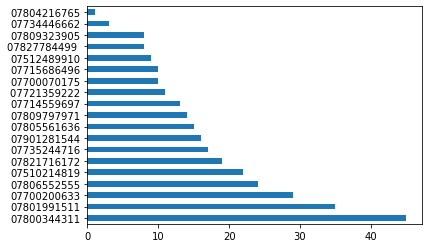

In [11]:
data['phone'].value_counts().plot(kind='barh');

* __*provider_name*__

In [12]:
data['provider_name'] = data['provider_name'].apply(lambda x: x.lower().strip())

data['provider_name'].unique() # or with for loop

array(['hareth muthanna khalil', 'bassam hamed',
       'muhammad hanoun al-sudani', 'saba sami', 'israa talib',
       'mostafa neama', 'mohamed abdel sattar', 'fayez akram al-salhi',
       'denise rashad', 'suha yasser', 'ahmed abdel hadi',
       'muhammad moayad', 'nadia reda', 'tahseen thweeny', 'baqer kredi',
       'silwan akram', 'ali al-shamaa', 'ali aziz', 'mustafa mazen',
       'marwa el khayat', 'raghad al shammari', 'marwa al-bawi',
       'fadel hani', 'ahmad hamad', 'ammar fadel', 'osama al-sudani',
       'alaa sheikh', 'marwa iyad', 'abeer riad', 'nawaf mahmoud',
       'ammar ali athra', 'thamer al-rubaie', 'salama hamed',
       'ahmed aboud al-akedi', 'haider al ameri', 'uday al hashemi',
       'talib al-zaidi', 'heba khairy', 'omar adnan al mulla',
       'mohammed abdullah', 'hussein al dabbagh', 'wael sami',
       'issam al-shamry', 'najmuddin al-rozmanaji', 'adnan qahtan khalaf',
       'bahaa al-anbari', 'wael kamel hamad', 'khudair jasim al-rawaq',
       

In [13]:
def fix_name(name):
    if 'dr.' in name:
        return name.replace('.' ,'')[3:]
    else:
        return name
data['provider_name'] = data['provider_name'].apply(fix_name)
data['provider_name'].unique()

array(['hareth muthanna khalil', 'bassam hamed',
       'muhammad hanoun al-sudani', 'saba sami', 'israa talib',
       'mostafa neama', 'mohamed abdel sattar', 'fayez akram al-salhi',
       'denise rashad', 'suha yasser', 'ahmed abdel hadi',
       'muhammad moayad', 'nadia reda', 'tahseen thweeny', 'baqer kredi',
       'silwan akram', 'ali al-shamaa', 'ali aziz', 'mustafa mazen',
       'marwa el khayat', 'raghad al shammari', 'marwa al-bawi',
       'fadel hani', 'ahmad hamad', 'ammar fadel', 'osama al-sudani',
       'alaa sheikh', 'marwa iyad', 'abeer riad', 'nawaf mahmoud',
       'ammar ali athra', 'thamer al-rubaie', 'salama hamed',
       'ahmed aboud al-akedi', 'haider al ameri', 'uday al hashemi',
       'talib al-zaidi', 'heba khairy', 'omar adnan al mulla',
       'mohammed abdullah', 'hussein al dabbagh', 'wael sami',
       'issam al-shamry', 'najmuddin al-rozmanaji', 'adnan qahtan khalaf',
       'bahaa al-anbari', 'wael kamel hamad', 'khudair jasim al-rawaq',
       

* __*doctor_specialty*__

In [14]:
data['doctor_specialty'] = data['doctor_specialty'].apply(lambda x: str(x).lower().strip())
data['doctor_specialty'].value_counts()

general surgery                                  24
neurology                                        20
pediatric                                        18
ophthalmology                                    18
orthology                                        17
ent                                              15
gynecology                                       14
dermatology                                      14
obstetrics and gynecology                        14
orthopedics                                      13
urology surgery                                  12
internal medicin , cardiology                    10
internal medicine                                10
radiology                                         9
urology                                           7
pediatrics                                        7
cardiology                                        6
internal medicin,cardiology,pulmonology           6
e.n.t                                             6
internal med

In [15]:
data['doctor_specialty'] = data['doctor_specialty'].apply(lambda x: str(x).split(',')[-1].strip())

data['doctor_specialty'] = (data['doctor_specialty']
                            .str
                            .replace('gyncology', 'gynecology')
                            .replace('gynicology', 'gynecology')
                            .replace('gyneocology', 'gynecology')
                            .replace('ent', 'e.n.t')
                            .replace('e nt', 'e.n.t')
                            .replace('internal medicin', 'internal medicine')
                            .replace('dentist', 'dentistry')
                            .replace('orthopedic', 'orthopedics')
                            .replace('neurolgy', 'neurology')
                            .replace('orthopedic surgery', 'orthopedics surgery')
                            .replace('orthopidic', 'orthopedics')
                            .replace('neurosurgery', 'neuro surgery')
                            .replace('neurology surgerion', 'neuro surgery')
                            .replace('general surgury', 'general surgery')
                            .replace('cardiolog', 'cardiology')
                            .replace('pediatric', 'pediatrics')
                            .replace('nan', np.nan))
                            
data['doctor_specialty'].value_counts()

general surgery                 27
pediatrics                      25
neurology                       22
e.n.t                           22
cardiology                      21
gynecology                      19
orthopedics                     18
ophthalmology                   18
orthology                       17
dermatology                     14
obstetrics and gynecology       14
urology surgery                 12
internal medicine               11
radiology                        9
urology                          7
pulmonology                      6
resident doctor                  5
dentistry                        4
orthopedics surgery              4
neuro surgery                    4
gastroenterology                 3
vascular surgery                 3
oncology                         3
hematology                       2
plastic surgery                  2
nephrology                       2
cardiology and pulmonology       2
cardiology and thoracic          2
nervous system and j

* __*address*__

In [16]:
data['address'] = data['address'].apply(lambda x: x.lower().strip())
data['address'].value_counts()

al-dahwi hospital                         40
karrada / salman faeq street              35
al-dowaly hospital                        29
roya medical center                       24
dfad mousel {al-zahrawi}                  22
al-haramain center                        19
al-shams medical complex                  17
al-hayat medical center                   16
new iraq center                           15
al-zayton hospital                        14
adam center2                              13
al-qemma hospital / al-atifia hospital    11
international medical center              10
hamorabi medical center                   10
al razi center                             9
al-razi hospital                           8
ishtar babylon complex                     8
al-dahoway hospital / al-harthiya          5
al-saydia corner complex                   3
dijlah st - al-shams building              1
Name: address, dtype: int64

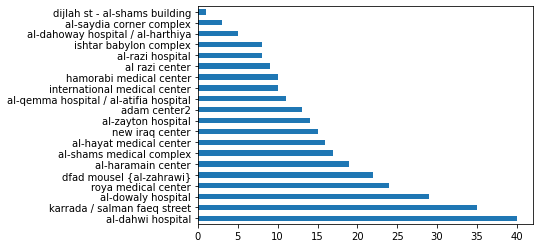

In [17]:
data['address'].value_counts().plot(kind='barh');

* __*region*__

In [18]:
data['region'] = data['region'].apply(lambda x: x.lower().strip())
data['region'].value_counts()

al-harthiya         83
mousel              44
karrada             35
maysan              33
alwazayria          29
samawa              19
palestine street    16
al-atifia           11
babel               10
al-wathiq square    10
alramadi             8
babylon              8
al-saydia            3
Name: region, dtype: int64

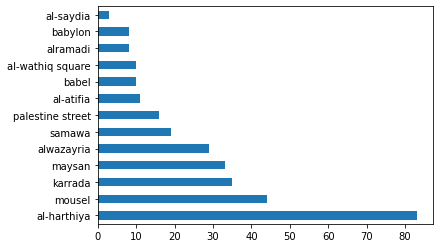

In [19]:
data['region'].value_counts().plot(kind='barh');

* __*governorate*__

In [20]:
data['governorate'] = data['governorate'].apply(lambda x: x.lower().strip())
data['governorate'].value_counts()

baghdad       187
mousel         44
maysan         33
al-muthana     19
babel          10
babylon         8
alramadi        8
Name: governorate, dtype: int64

In [21]:
data['governorate'] = data['governorate'].replace('babel', 'babylon')

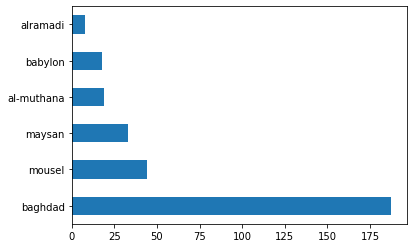

In [22]:
data['governorate'].value_counts().plot(kind='barh');

In [23]:
data.isna().sum()

phone               0
provider_name       0
doctor_specialty    1
address             0
region              0
governorate         0
dtype: int64

In [24]:
data.dropna(axis=0, inplace=True)

In [25]:
data.head()

,phone,provider_name,doctor_specialty,address,region,governorate
0,07700200633,hareth muthanna khalil,general surgery,al-dowaly hospital,alwazayria,baghdad
1,07700200633,bassam hamed,pediatrics,al-dowaly hospital,alwazayria,baghdad
2,07700200633,muhammad hanoun al-sudani,nephrology,al-dowaly hospital,alwazayria,baghdad
3,07700200633,saba sami,obstetrics and gynecology,al-dowaly hospital,alwazayria,baghdad
4,07700200633,israa talib,obstetrics and gynecology,al-dowaly hospital,alwazayria,baghdad
